In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Testing Gradient Boosting 

In [113]:
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV, train_test_split

## 1. Regression
### 1.1 Nonlinear one-dimensional synthetic problem

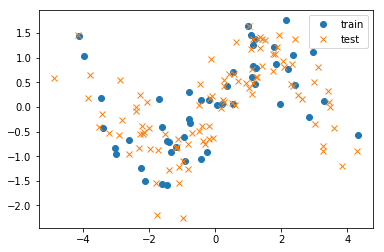

In [98]:
n = 150
noise_var = 0.5

X = np.linspace(-3, 3, n) + np.random.randn(n)
y = np.sin(X) + noise_var * np.random.randn(n)
Xtr, Xts, ytr, yts = train_test_split(X.reshape(-1, 1), y, test_size=100)

plt.plot(Xtr, ytr, 'o', label='train')
plt.plot(Xts, yts, 'x', label='test')
plt.legend();

Absolute average test error: 0.584
Absolute average train error: 0.015


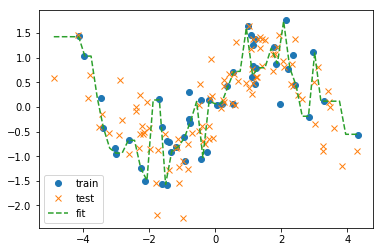

In [99]:
gb =  GBR(n_estimators=500, max_depth=2)

gb.fit(Xtr, ytr)
print('Absolute average test error: {:2.3f}'.format(metrics.mean_absolute_error(yts, gb.predict(Xts))))
print('Absolute average train error: {:2.3f}'.format(metrics.mean_absolute_error(ytr, gb.predict(Xtr))))

xaxis = np.linspace(np.min(X), np.max(X))

plt.plot(Xtr, ytr, 'o', label='train')
plt.plot(Xts, yts, 'x', label='test')
plt.plot(xaxis, gb.predict(xaxis[:,None]), '--', label='fit')
plt.legend();

In [100]:
ts_scores = []
tr_scores = []
M = 300

for m in range(1, M):
    if m == 1:
        gb = GBR(n_estimators=1, max_depth=2,
                 warm_start=True, learning_rate=0.08,
                 subsample=0.5)
    else:
        gb.set_params(n_estimators=m)
    gb.fit(Xtr, ytr)
    
    ts_scores.append(metrics.mean_absolute_error(yts, gb.predict(Xts)))
    tr_scores.append(metrics.mean_absolute_error(ytr, gb.predict(Xtr)))

Best test score: 0.416 after 22 iters
Best train score: 0.144 after 298 iters


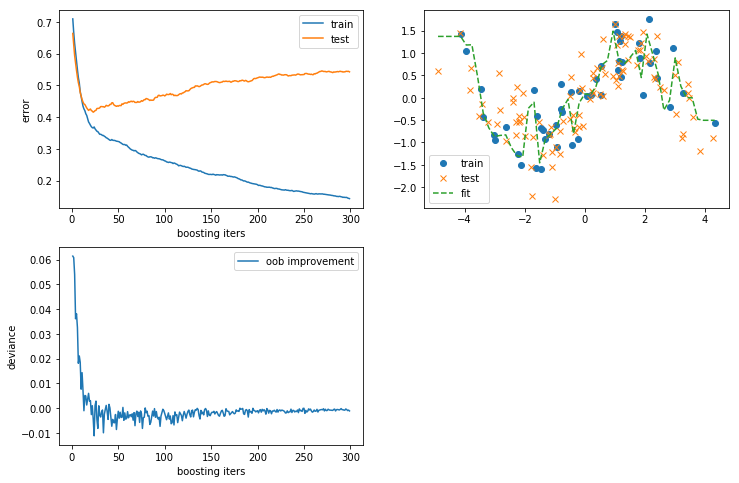

In [102]:
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(np.arange(1, M), tr_scores, label='train')
plt.plot(np.arange(1, M), ts_scores, label='test')
plt.xlabel('boosting iters')
plt.ylabel('error')
plt.legend()

plt.subplot(222)
plt.plot(Xtr, ytr, 'o', label='train')
plt.plot(Xts, yts, 'x', label='test')
plt.plot(xaxis, gb.predict(xaxis[:,None]), '--', label='fit')
plt.legend()

plt.subplot(223)
plt.plot(np.arange(1, M), gb.oob_improvement_, label='oob improvement')
plt.xlabel('boosting iters')
plt.ylabel('deviance')
plt.legend();

print('Best test score: {:2.3f} after {:2.0f} iters'.format(np.min(ts_scores), np.argmin(ts_scores)))
print('Best train score: {:2.3f} after {:2.0f} iters'.format(np.min(tr_scores), np.argmin(tr_scores)))

### 1.1 Diabetes dataset

(110, 10)
(332, 10)


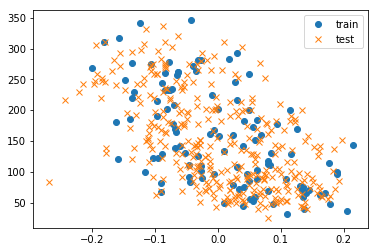

In [124]:
X, y = datasets.load_diabetes(return_X_y=True)
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.75)

pca = KernelPCA(n_components=1).fit(X)

plt.plot(pca.transform(Xtr), ytr, 'o', label='train')
plt.plot(pca.transform(Xts), yts, 'x', label='test')
plt.legend();

print(Xtr.shape)
print(Xts.shape)

In [177]:
ts_scores = []
tr_scores = []
M = 1000

for m in range(1, M):
    if m == 1:
        gb = GBR(n_estimators=1, max_depth=2,
                 warm_start=True, learning_rate=0.001,
                 subsample=0.5)
    else:
        gb.set_params(n_estimators=m)
    gb.fit(Xtr, ytr)
    
    ts_scores.append(metrics.mean_absolute_error(yts, gb.predict(Xts)))
    tr_scores.append(metrics.mean_absolute_error(ytr, gb.predict(Xtr)))

Best test score: 51.286 after 998 iters
Best train score: 49.043 after 998 iters


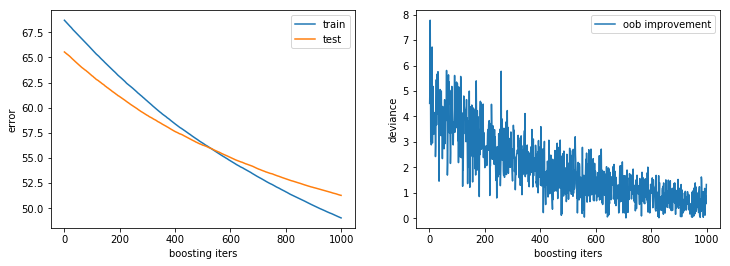

In [178]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(np.arange(1, M), tr_scores, label='train')
plt.plot(np.arange(1, M), ts_scores, label='test')
plt.xlabel('boosting iters')
plt.ylabel('error')
plt.legend()

plt.subplot(122)
plt.plot(np.arange(1, M), np.abs(gb.oob_improvement_), label='oob improvement')
plt.xlabel('boosting iters')
plt.ylabel('deviance')
plt.legend();

print('Best test score: {:2.3f} after {:2.0f} iters'.format(np.min(ts_scores), np.argmin(ts_scores)))
print('Best train score: {:2.3f} after {:2.0f} iters'.format(np.min(tr_scores), np.argmin(tr_scores)))

In [179]:
tol = 1e-2
np.where(np.abs(gb.oob_improvement_) < tol)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0